In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
Air=pd.read_excel("C:/Users/gosav/Desktop/New folder@/Airlines+Data.xlsx")
Air.head(10)

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
5,1995-06-01,135
6,1995-07-01,148
7,1995-08-01,148
8,1995-09-01,136
9,1995-10-01,119


In [5]:
Air.shape

(96, 2)

In [6]:
Air.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [7]:
Air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [8]:
Air.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


<AxesSubplot:>

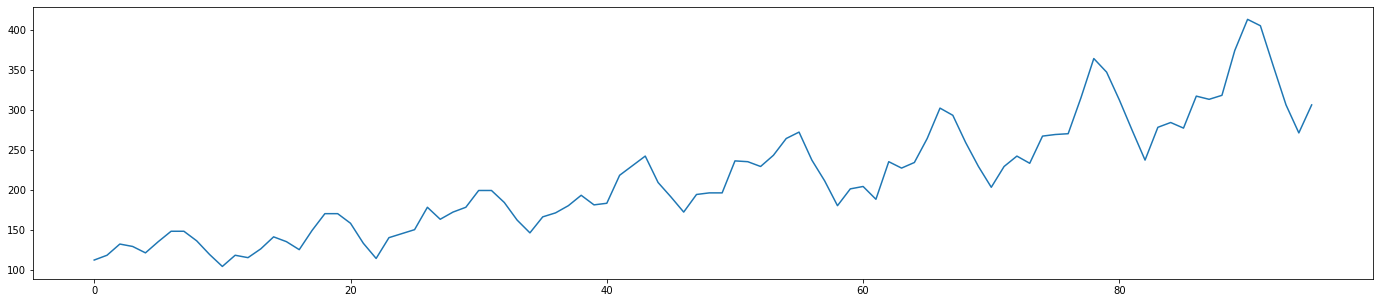

In [9]:
plt.figure(figsize=(24,5))
Air.Passengers.plot()

In [10]:
Air["Date"] = pd.to_datetime(Air.Month,format="%b-%y")
Air["month"] = Air.Date.dt.strftime("%b")
Air["year"] = Air.Date.dt.strftime("%y")
Air["Day"] = Air.Date.dt.strftime("%d")
Air["wkday"] = Air.Date.dt.strftime("%A")
Air

,Month,Passengers,Date,month,year,Day,wkday
0,1995-01-01,112,1995-01-01,Jan,95,01,Sunday
1,1995-02-01,118,1995-02-01,Feb,95,01,Wednesday
2,1995-03-01,132,1995-03-01,Mar,95,01,Wednesday
3,1995-04-01,129,1995-04-01,Apr,95,01,Saturday
4,1995-05-01,121,1995-05-01,May,95,01,Monday
...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,02,01,Thursday
92,2002-09-01,355,2002-09-01,Sep,02,01,Sunday
93,2002-10-01,306,2002-10-01,Oct,02,01,Tuesday
94,2002-11-01,271,2002-11-01,Nov,02,01,Friday


<AxesSubplot:xlabel='month', ylabel='year'>

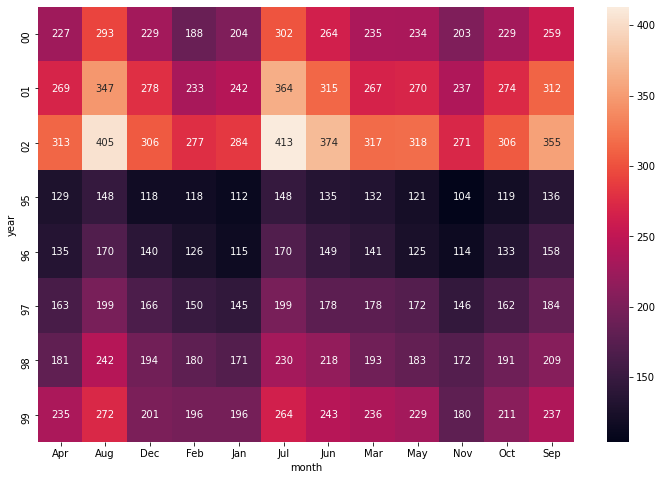

In [12]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=Air,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

<AxesSubplot:xlabel='year', ylabel='Passengers'>

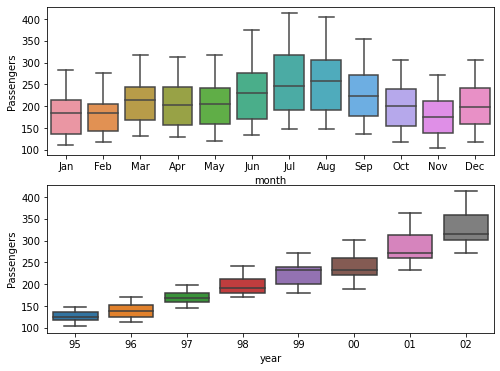

In [13]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=Air)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=Air)

In [14]:
month =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

<ipython-input-15-ba1bbfb90fde>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Air['month'][i]= A[0:3]


<AxesSubplot:>

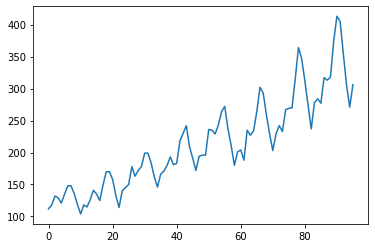

In [15]:

A = Air["month"][0]
A[0:3]
Air['Month']= 0

for i in range(96):
    A = Air["month"][i]
    Air['month'][i]= A[0:3]
    
month_dummies = pd.DataFrame(pd.get_dummies(Air['month']))
Air1 = pd.concat([Air.Passengers,month_dummies],axis = 1)

Air1["t"] = np.arange(1,97)

Air1["t_square"] = Air1["t"]*Air1["t"]
Air1.columns
Air1["log_Passengers"] = np.log(Air1["Passengers"])
Air1.rename(columns={"Passengers ": 'Passengers'}, inplace=True)
Air1.Passengers.plot()

In [16]:
Air1

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
0,112,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,118,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,132,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,129,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,121,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,405,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,355,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,306,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,271,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119


<AxesSubplot:xlabel='year', ylabel='Passengers'>

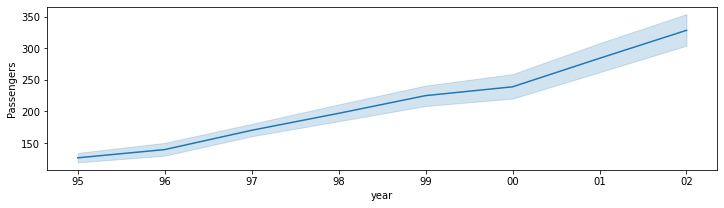

In [17]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=Air)

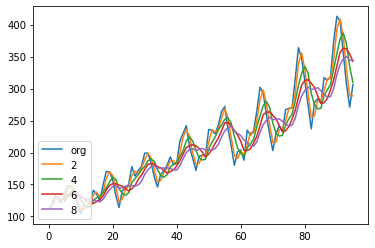

In [18]:
Air.Passengers.plot(label="org")
for i in range(2,10,2):
    Air["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

<AxesSubplot:>

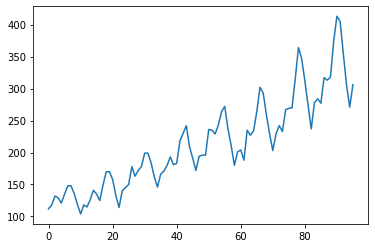

In [19]:
Air.Passengers.plot()

In [20]:
Train = Air1.head(72)


In [21]:
Test = Air1.iloc[72:84,:]

In [22]:
predict_data = Air1.tail(12)

In [23]:
Air2= Air1.iloc[0:84,:]

In [25]:
Train

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
0,112,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,118,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,132,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,129,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,121,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,293,0,1,0,0,0,0,0,0,0,0,0,0,68,4624,5.680173
68,259,0,0,0,0,0,0,0,0,0,0,0,1,69,4761,5.556828
69,229,0,0,0,0,0,0,0,0,0,0,1,0,70,4900,5.433722
70,203,0,0,0,0,0,0,0,0,0,1,0,0,71,5041,5.313206


In [26]:
Test

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
72,242,0,0,0,0,1,0,0,0,0,0,0,0,73,5329,5.488938
73,233,0,0,0,1,0,0,0,0,0,0,0,0,74,5476,5.451038
74,267,0,0,0,0,0,0,0,1,0,0,0,0,75,5625,5.587249
75,269,1,0,0,0,0,0,0,0,0,0,0,0,76,5776,5.594711
76,270,0,0,0,0,0,0,0,0,1,0,0,0,77,5929,5.598422
77,315,0,0,0,0,0,0,1,0,0,0,0,0,78,6084,5.752573
78,364,0,0,0,0,0,1,0,0,0,0,0,0,79,6241,5.897154
79,347,0,1,0,0,0,0,0,0,0,0,0,0,80,6400,5.849325
80,312,0,0,0,0,0,0,0,0,0,0,0,1,81,6561,5.743003
81,274,0,0,0,0,0,0,0,0,0,0,1,0,82,6724,5.613128


In [27]:
predict_data

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
84,284,0,0,0,0,1,0,0,0,0,0,0,0,85,7225,5.648974
85,277,0,0,0,1,0,0,0,0,0,0,0,0,86,7396,5.624018
86,317,0,0,0,0,0,0,0,1,0,0,0,0,87,7569,5.758902
87,313,1,0,0,0,0,0,0,0,0,0,0,0,88,7744,5.746203
88,318,0,0,0,0,0,0,0,0,1,0,0,0,89,7921,5.762051
89,374,0,0,0,0,0,0,1,0,0,0,0,0,90,8100,5.924256
90,413,0,0,0,0,0,1,0,0,0,0,0,0,91,8281,6.023448
91,405,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,355,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,306,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585


In [28]:
import statsmodels.formula.api as smf 
linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

42.78656082093167

In [30]:
Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

38.781761813929876

In [31]:
Quad = smf.ols('Passengers~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

42.94925714948884

In [32]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

103.1143176285428

In [33]:
add_sea_Quad = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

25.48137503176301

In [35]:
Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

108.10379108134933

In [37]:
Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

11.82042095012258

In [38]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,11.820421
4,rmse_add_sea_quad,25.481375
1,rmse_Exp,38.781762
0,rmse_linear,42.786561
2,rmse_Quad,42.949257
3,rmse_add_sea,103.114318
5,rmse_Mult_sea,108.103791


In [39]:
predict_data

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
84,284,0,0,0,0,1,0,0,0,0,0,0,0,85,7225,5.648974
85,277,0,0,0,1,0,0,0,0,0,0,0,0,86,7396,5.624018
86,317,0,0,0,0,0,0,0,1,0,0,0,0,87,7569,5.758902
87,313,1,0,0,0,0,0,0,0,0,0,0,0,88,7744,5.746203
88,318,0,0,0,0,0,0,0,0,1,0,0,0,89,7921,5.762051
89,374,0,0,0,0,0,0,1,0,0,0,0,0,90,8100,5.924256
90,413,0,0,0,0,0,1,0,0,0,0,0,0,91,8281,6.023448
91,405,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,355,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,306,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585


In [40]:
model_full = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Air2).fit()


In [41]:
pred_new  = pd.Series(Mul_Add_sea.predict(predict_data))
pred_new

84    5.637978
85    5.662487
86    5.808210
87    5.765280
88    5.753323
89    5.865720
90    5.966763
91    5.975173
92    5.867869
93    5.740788
94    5.611277
95    5.746501
dtype: float64

In [42]:
predict_data["forecasted_Passengers"] = pd.DataFrame(pred_new)

<ipython-input-42-43dd3da0300d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data["forecasted_Passengers"] = pd.DataFrame(pred_new)


In [44]:
predict_data

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers,forecasted_Passengers
84,284,0,0,0,0,1,0,0,0,0,0,0,0,85,7225,5.648974,5.637978
85,277,0,0,0,1,0,0,0,0,0,0,0,0,86,7396,5.624018,5.662487
86,317,0,0,0,0,0,0,0,1,0,0,0,0,87,7569,5.758902,5.808210
87,313,1,0,0,0,0,0,0,0,0,0,0,0,88,7744,5.746203,5.765280
88,318,0,0,0,0,0,0,0,0,1,0,0,0,89,7921,5.762051,5.753323
89,374,0,0,0,0,0,0,1,0,0,0,0,0,90,8100,5.924256,5.865720
90,413,0,0,0,0,0,1,0,0,0,0,0,0,91,8281,6.023448,5.966763
91,405,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887,5.975173
92,355,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118,5.867869
93,306,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585,5.740788


In [46]:
Coca=pd.read_excel("C:/Users/gosav/Desktop/New folder@/CocaCola_Sales_Rawdata.xlsx")
Coca.head(10)

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [48]:
Coca.shape

(42, 2)

In [50]:
Coca.dtypes

Quarter     object
Sales      float64
dtype: object

In [51]:
Coca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [52]:
Coca.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


C:\Users\gosav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

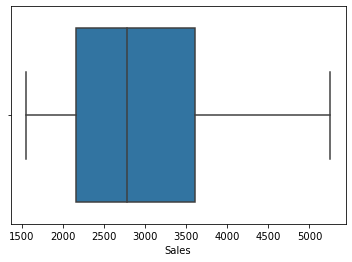

In [53]:
sns.boxplot("Sales",data=Coca)

C:\Users\gosav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


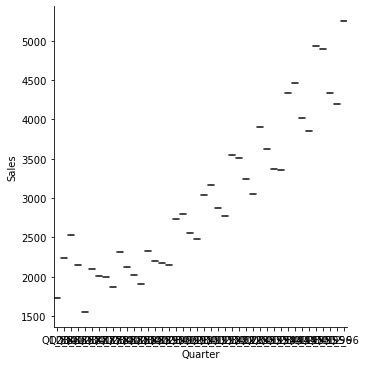

In [54]:
sns.catplot("Quarter","Sales",data=Coca,kind="box")

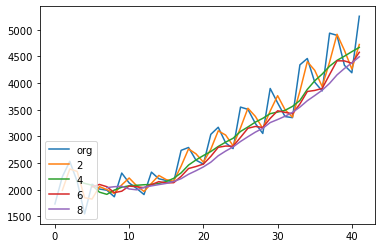

In [55]:
Coca.Sales.plot(label="org")
for i in range(2,10,2):
    Coca["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

<AxesSubplot:>

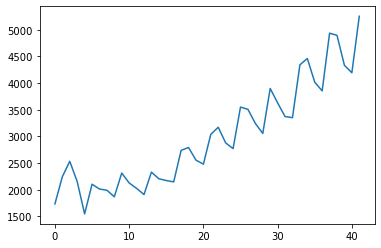

In [56]:
Coca.Sales.plot()

<AxesSubplot:>

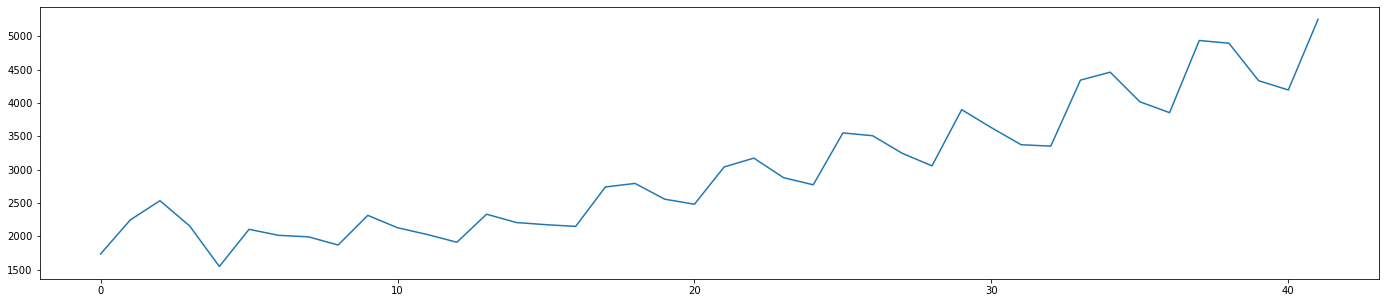

In [57]:
plt.figure(figsize=(24,5))
Coca.Sales.plot()

In [59]:
quarter=['Q1','Q2','Q3','Q4']
n=Coca['Quarter'][0]
n[0:2]

'Q1'

In [61]:
Coca['quarter']=0
for i in range(42):
    n=Coca['Quarter'][i]
    Coca['quarter'][i]=n[0:2]
    dummy=pd.DataFrame(pd.get_dummies(Coca['quarter']))
    coco=pd.concat((Coca,dummy),axis=1)
t= np.arange(1,43)
coco['t']=t
coco['t_square']=coco['t']*coco['t']
log_Sales=np.log(coco['Sales'])
coco['log_Sales']=log_Sales

<ipython-input-61-80bfb53e9d09>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Coca['quarter'][i]=n[0:2]


In [62]:
coco

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


<AxesSubplot:xlabel='quarter', ylabel='Sales'>

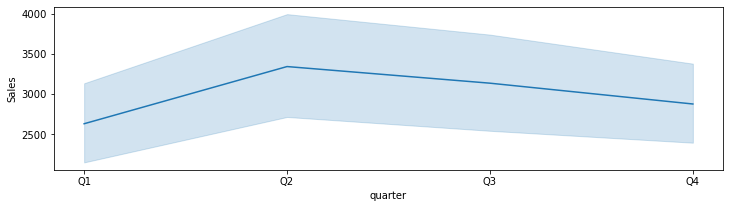

In [64]:
plt.figure(figsize=(12,3))
sns.lineplot(x="quarter",y="Sales",data=Coca)

In [65]:
Train = coco.head(34)


In [66]:
Test = coco.iloc[34:38,:]

In [67]:
predict_data = coco.tail(4)

In [68]:
Coca2= coco.iloc[0:38,:]

In [70]:
Train

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


In [71]:
Test

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
34,Q3_94,4461.0,Q3,0,0,1,0,35,1225,8.403128
35,Q4_94,4017.0,Q4,0,0,0,1,36,1296,8.298291
36,Q1_95,3854.0,Q1,1,0,0,0,37,1369,8.256867
37,Q2_95,4936.0,Q2,0,1,0,0,38,1444,8.504311


In [72]:
predict_data

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
38,Q3_95,4895.0,Q3,0,0,1,0,39,1521,8.495970
39,Q4_95,4333.0,Q4,0,0,0,1,40,1600,8.374015
40,Q1_96,4194.0,Q1,1,0,0,0,41,1681,8.341410
41,Q2_96,5253.0,Q2,0,1,0,0,42,1764,8.566555


In [74]:
import statsmodels.formula.api as smf 
linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

669.4685590402645

In [76]:
Exp = smf.ols('log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

564.5012993862516

In [77]:
Quad = smf.ols('Sales~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

394.6747277541495

In [78]:
add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1686.738964636288

In [80]:
add_sea_Quad = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','Q4','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

174.88610047129018

In [82]:
Mul_sea = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1757.7740414202256

In [84]:
Mul_Add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

404.56422621594544

In [85]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,174.886100
2,rmse_Quad,394.674728
6,rmse_Mult_add_sea,404.564226
1,rmse_Exp,564.501299
0,rmse_linear,669.468559
3,rmse_add_sea,1686.738965
5,rmse_Mult_sea,1757.774041


In [87]:
predict_data

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
38,Q3_95,4895.0,Q3,0,0,1,0,39,1521,8.495970
39,Q4_95,4333.0,Q4,0,0,0,1,40,1600,8.374015
40,Q1_96,4194.0,Q1,1,0,0,0,41,1681,8.341410
41,Q2_96,5253.0,Q2,0,1,0,0,42,1764,8.566555


In [89]:
model_full = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=Coca2).fit()

In [90]:
pred_new  = pd.Series(add_sea_Quad.predict(predict_data))
pred_new


38    4839.220330
39    4731.881928
40    4668.345851
41    5399.952382
dtype: float64

In [92]:
predict_data["forecasted_Sales"] = pd.DataFrame(pred_new)

<ipython-input-92-33d50a554571>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data["forecasted_Sales"] = pd.DataFrame(pred_new)


In [93]:
predict_data

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales,forecasted_Sales
38,Q3_95,4895.0,Q3,0,0,1,0,39,1521,8.495970,4839.220330
39,Q4_95,4333.0,Q4,0,0,0,1,40,1600,8.374015,4731.881928
40,Q1_96,4194.0,Q1,1,0,0,0,41,1681,8.341410,4668.345851
41,Q2_96,5253.0,Q2,0,1,0,0,42,1764,8.566555,5399.952382
